Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 528s 2s/step - accuracy: 0.4123 - loss: 1.6941 - val_accuracy: 0.5503 - val_loss: 1.2958
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 598s 2s/step - accuracy: 0.5645 - loss: 1.2602 - val_accuracy: 0.5728 - val_loss: 1.2326
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 521s 2s/step - accuracy: 0.5880 - loss: 1.1871 - val_accuracy: 0.5825 - val_loss: 1.1983
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 600s 2s/step - accuracy: 0.6016 - loss: 1.1484 - val_accuracy: 0.5862 - val_loss: 1.1862
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 517s 2s/step - accuracy: 0.6104 - loss: 1.1186 - val_accuracy: 0.5875 - val_loss: 1.1811
313/313 ━━━━━━━━━━━━━━━━━━━━ 110s 350ms/step - accuracy: 0.5831 - loss: 1.1855
Test Accuracy: 0.5848000049591064
Test Loss: 1.1890559196472168


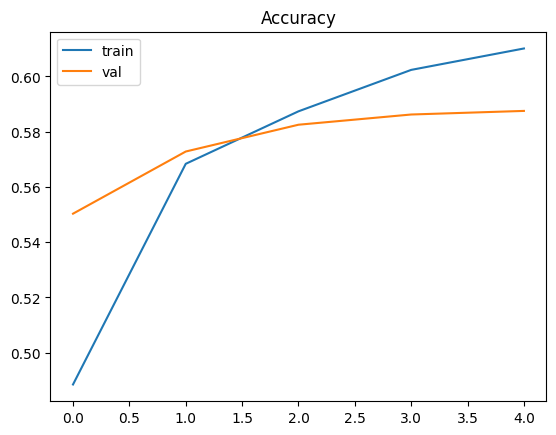

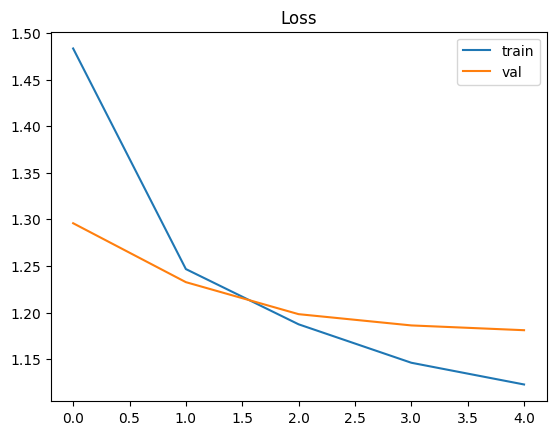

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
Predicted: [3 8 8 1 6 6 5 4 5 5]
Actual:  [3 8 8 0 6 6 1 6 3 1]


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# One-hot
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Pretrained VGG16 (small input — faster)
base = VGG16(weights="imagenet", include_top=False, input_shape=(32,32,3))
for layer in base.layers:
    layer.trainable = False     # freeze layers → huge speedup

x = Flatten()(base.output)
x = Dense(128, activation='relu')(x)
out = Dense(10, activation='softmax')(x)

model = Model(base.input, out)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(
    X_train, y_train,
    epochs=5,              # reduced → faster
    batch_size=128,        # bigger batch → faster
    validation_split=0.2
)

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

# Graphs
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("Loss")
plt.legend()
plt.show()

# Predictions
pred = model.predict(X_test[:10])
pred_labels = np.argmax(pred, axis=1)
true_labels = np.argmax(y_test[:10], axis=1)

print("Predicted:", pred_labels)
print("Actual: ", true_labels)
